***11.5 Exploratory Data Analysis***

Employee Attrition Analysis

Context
The key to success in any organization is attracting and retaining top talent. I teach HR courses and I want to explore why employees leave. The data generated by IBM is a good example of this.

The dependent variable is Attrition, which is a "Yes/No" variable.
I will do exloratory data analysis on the HR-Employee-Attrition.csv dataset, before running classification models.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:

#import ydata_profiling
#from ydata_profiling.utils.cache import cache_file


In [3]:
import statsmodels as sm
import scipy as sp

In [4]:
import math

In [5]:
Data_path= "/Users/SHSU/Library/Mobile Documents/com~apple~CloudDocs/Documents/GitHub/Springboard/Capstone Two/HR-Employee-Attrition.csv"
df = pd.read_csv(Data_path)

In [6]:
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [8]:
# I will drop the following columns: EmployeeCount, EmployeeNumber, Over18, StandardHours. These columns are not useful for analysis.
df=df.drop(["EmployeeCount", "EmployeeNumber","Over18","StandardHours"], axis=1)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

In [10]:
df.head() # Ordinal values have been replaced with actual categories.

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                 1          2  Life Sciences                        2   
1                 8          1  Life Sciences                        3   
2                 2          2          Other                        4   
3                 3          4  Life Sciences                        4   
4                 2          1        Medical                        1   

   Gender  ...  PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0  Female  ...                  3                         1                 0   
1    Male  ...                  4                         4                 1   
2    Male  ...                  3                         2                 0   
3  Female  ...                  3                         3                 0   
4    Male  ...                  3                         4                 1   

  TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                 8                      0               1               6   
1                10                      3               3              10   
2                 7                      3               3               0   
3                 8                      3               3               8   
4                 6                      3               3               2   

   YearsInCurrentRole  YearsSinceLastPromotion YearsWithCurrManager  
0                   4                        0                    5  
1                   7                        1                    7  
2                   0                        0                    0  
3                   7                        3                    0  
4                   2                        2                    2  

[5 rows x 31 columns]

In [11]:
df.isnull().sum() #checking for null values. No null values.

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [12]:
## The usual suspect of employee attrition is monthly income. Intuitively, one can say that people who are not happy with their pay are more likely to leave.
# I will make a scatterplot of MonthlyIncome vs TotalWorkingYears with Attrition being hue and see if there is any obvious pattern. 


<Axes: xlabel='MonthlyIncome', ylabel='JobSatisfaction'>

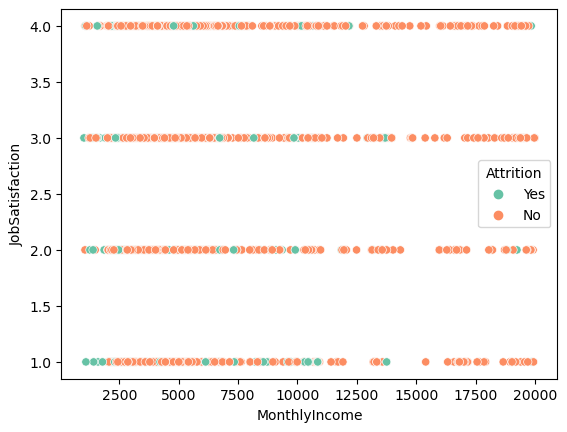

In [13]:
sns.scatterplot(x= "MonthlyIncome", y= "JobSatisfaction" , data=df, hue="Attrition",palette="Set2") 

<Axes: xlabel='Attrition', ylabel='MonthlyIncome'>

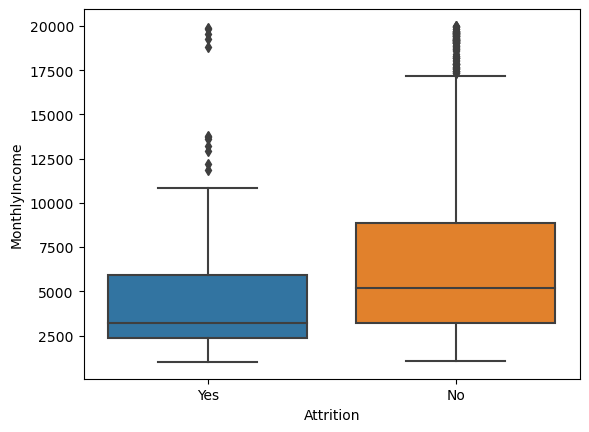

In [14]:
sns.boxplot(y='MonthlyIncome', x='Attrition', data=df)

<Axes: xlabel='Attrition', ylabel='MonthlyIncome'>

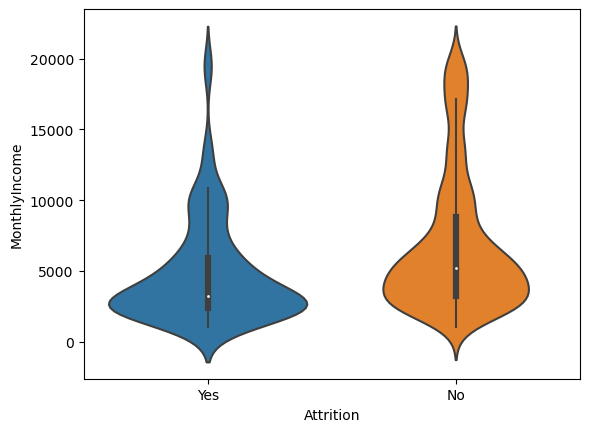

In [15]:
sns.violinplot(y='MonthlyIncome', x='Attrition', data=df)

/Users/SHSU/anaconda3/envs/springboard_env/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 15.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='Attrition', ylabel='MonthlyIncome'>

/Users/SHSU/anaconda3/envs/springboard_env/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 8.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/SHSU/anaconda3/envs/springboard_env/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 36.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


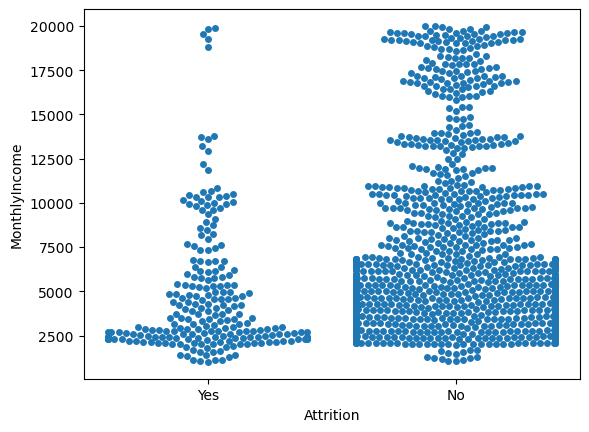

In [115]:
sns.swarmplot(y='MonthlyIncome', x='Attrition', data=df)

<Axes: xlabel='JobSatisfaction', ylabel='MonthlyIncome'>

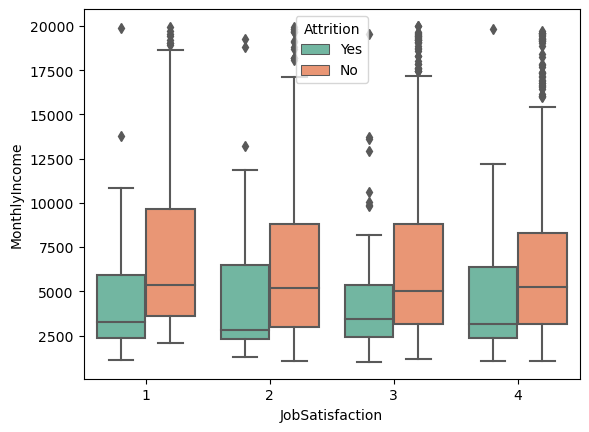

In [16]:
sns.boxplot(y='MonthlyIncome', x='JobSatisfaction', data=df, hue='Attrition', palette = 'Set2')

/Users/SHSU/anaconda3/envs/springboard_env/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 8.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/SHSU/anaconda3/envs/springboard_env/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 9.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/SHSU/anaconda3/envs/springboard_env/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 24.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/SHSU/anaconda3/envs/springboard_env/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 23.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, Use

<Axes: xlabel='EnvironmentSatisfaction', ylabel='MonthlyIncome'>

/Users/SHSU/anaconda3/envs/springboard_env/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 15.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/SHSU/anaconda3/envs/springboard_env/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 15.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/SHSU/anaconda3/envs/springboard_env/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 29.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/SHSU/anaconda3/envs/springboard_env/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 29.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, U

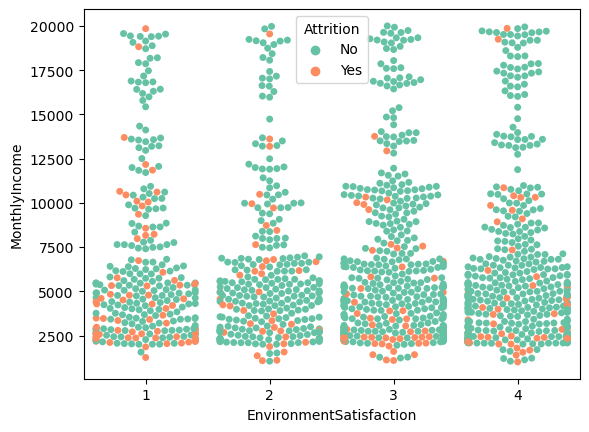

In [17]:
sns.swarmplot(y='MonthlyIncome', x='EnvironmentSatisfaction', data=df, hue='Attrition', palette = 'Set2')

<Axes: xlabel='WorkLifeBalance', ylabel='MonthlyIncome'>

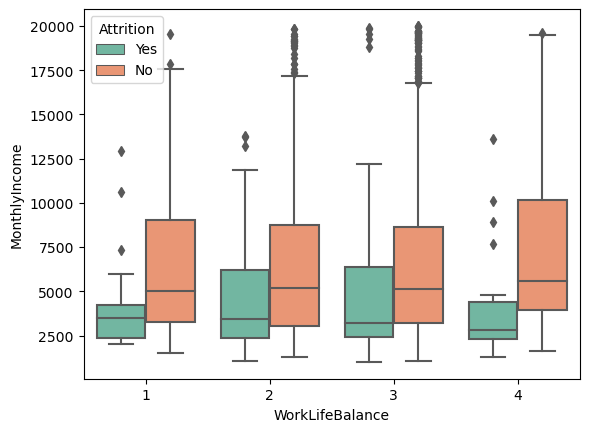

In [18]:
sns.boxplot(y='MonthlyIncome', x='WorkLifeBalance', data=df, hue='Attrition', palette = 'Set2')

<Axes: xlabel='WorkLifeBalance', ylabel='MonthlyIncome'>

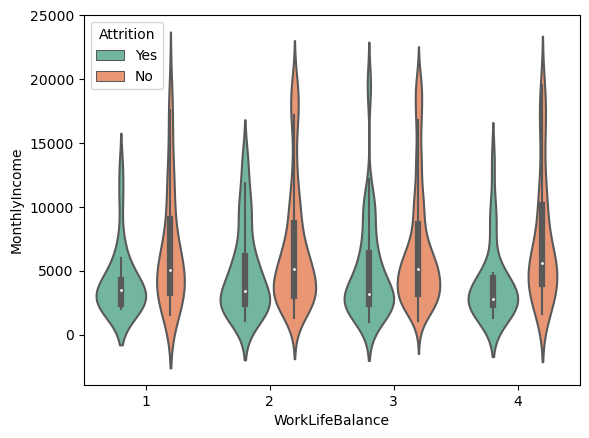

In [19]:
sns.violinplot(y='MonthlyIncome', x='WorkLifeBalance', data=df, hue='Attrition', palette = 'Set2')

/Users/SHSU/anaconda3/envs/springboard_env/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 19.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/SHSU/anaconda3/envs/springboard_env/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 43.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='WorkLifeBalance', ylabel='MonthlyIncome'>

/Users/SHSU/anaconda3/envs/springboard_env/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 23.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/SHSU/anaconda3/envs/springboard_env/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 48.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


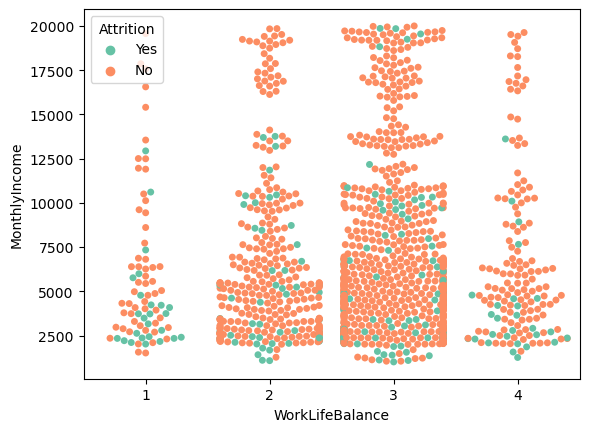

In [116]:
sns.swarmplot(y='MonthlyIncome', x='WorkLifeBalance', data=df, hue='Attrition', palette = 'Set2')

/Users/SHSU/anaconda3/envs/springboard_env/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 47.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/SHSU/anaconda3/envs/springboard_env/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 45.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/SHSU/anaconda3/envs/springboard_env/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 63.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/SHSU/anaconda3/envs/springboard_env/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 64.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, U

<Axes: xlabel='JobSatisfaction', ylabel='NumCompaniesWorked'>

/Users/SHSU/anaconda3/envs/springboard_env/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 57.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/SHSU/anaconda3/envs/springboard_env/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 54.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/SHSU/anaconda3/envs/springboard_env/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 70.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/SHSU/anaconda3/envs/springboard_env/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 71.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, U

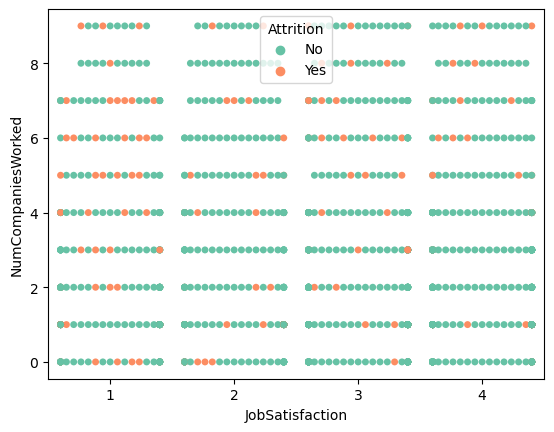

In [118]:
sns.swarmplot(y='NumCompaniesWorked', x='JobSatisfaction', data=df, hue='Attrition', palette = 'Set2')

/Users/SHSU/anaconda3/envs/springboard_env/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 40.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/SHSU/anaconda3/envs/springboard_env/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 67.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/SHSU/anaconda3/envs/springboard_env/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 11.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/SHSU/anaconda3/envs/springboard_env/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 15.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, U

<Axes: xlabel='NumCompaniesWorked', ylabel='Age'>

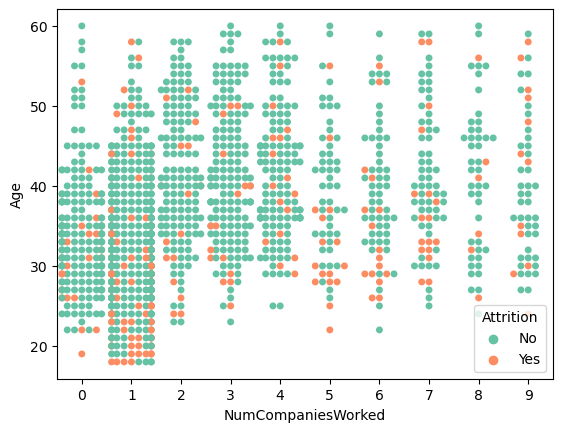

In [119]:
sns.swarmplot(x='NumCompaniesWorked', y='Age', data=df, hue='Attrition', palette = 'Set2')

<Axes: xlabel='Attrition', ylabel='NumCompaniesWorked'>

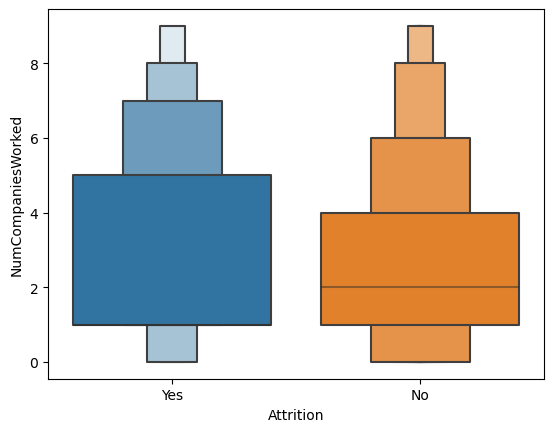

In [121]:
sns.boxenplot(y='NumCompaniesWorked', x='Attrition', data= df)

<Axes: xlabel='Attrition', ylabel='NumCompaniesWorked'>

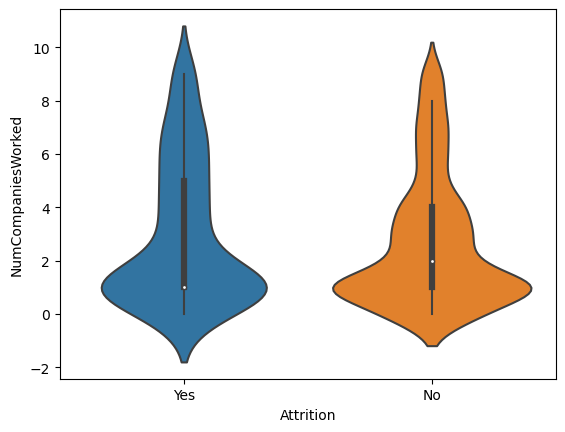

In [122]:
sns.violinplot(y='NumCompaniesWorked', x='Attrition', data= df)

/Users/SHSU/anaconda3/envs/springboard_env/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 20.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/SHSU/anaconda3/envs/springboard_env/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 61.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='Attrition', ylabel='NumCompaniesWorked'>

/Users/SHSU/anaconda3/envs/springboard_env/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 30.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/SHSU/anaconda3/envs/springboard_env/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 78.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


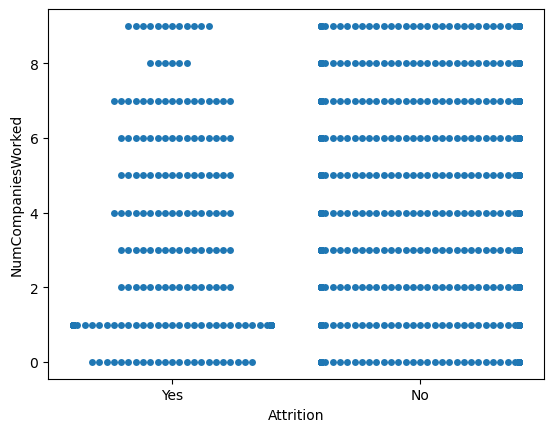

In [124]:
sns.swarmplot(y='NumCompaniesWorked', x='Attrition', data= df)

In [21]:
## It is difficult to spot an obvious patter in the scatterplot above. 
# Next, I will check the correlation between Attrition and MonthlyIncome.

In [22]:
# Point-Biserial Correlation between Attorition and MonthlyIncome
# I will run a point-biserial correlation test between Attrition and MonthlyIncome.
attrition=df.Attrition.replace({"Yes":1,"No":0})
sp.stats.pointbiserialr(attrition, df.MonthlyIncome)

SignificanceResult(statistic=-0.15983958238498877, pvalue=7.147363985353835e-10)

In [23]:
# No statististically significant correlation between Attrition and MonthlyIncome.

In [24]:
# Next, I will visualize the relationship between Attrition, MonthlyIncome, JobStaisfaction, EnvironmentalSatisfaction, and Gender. 

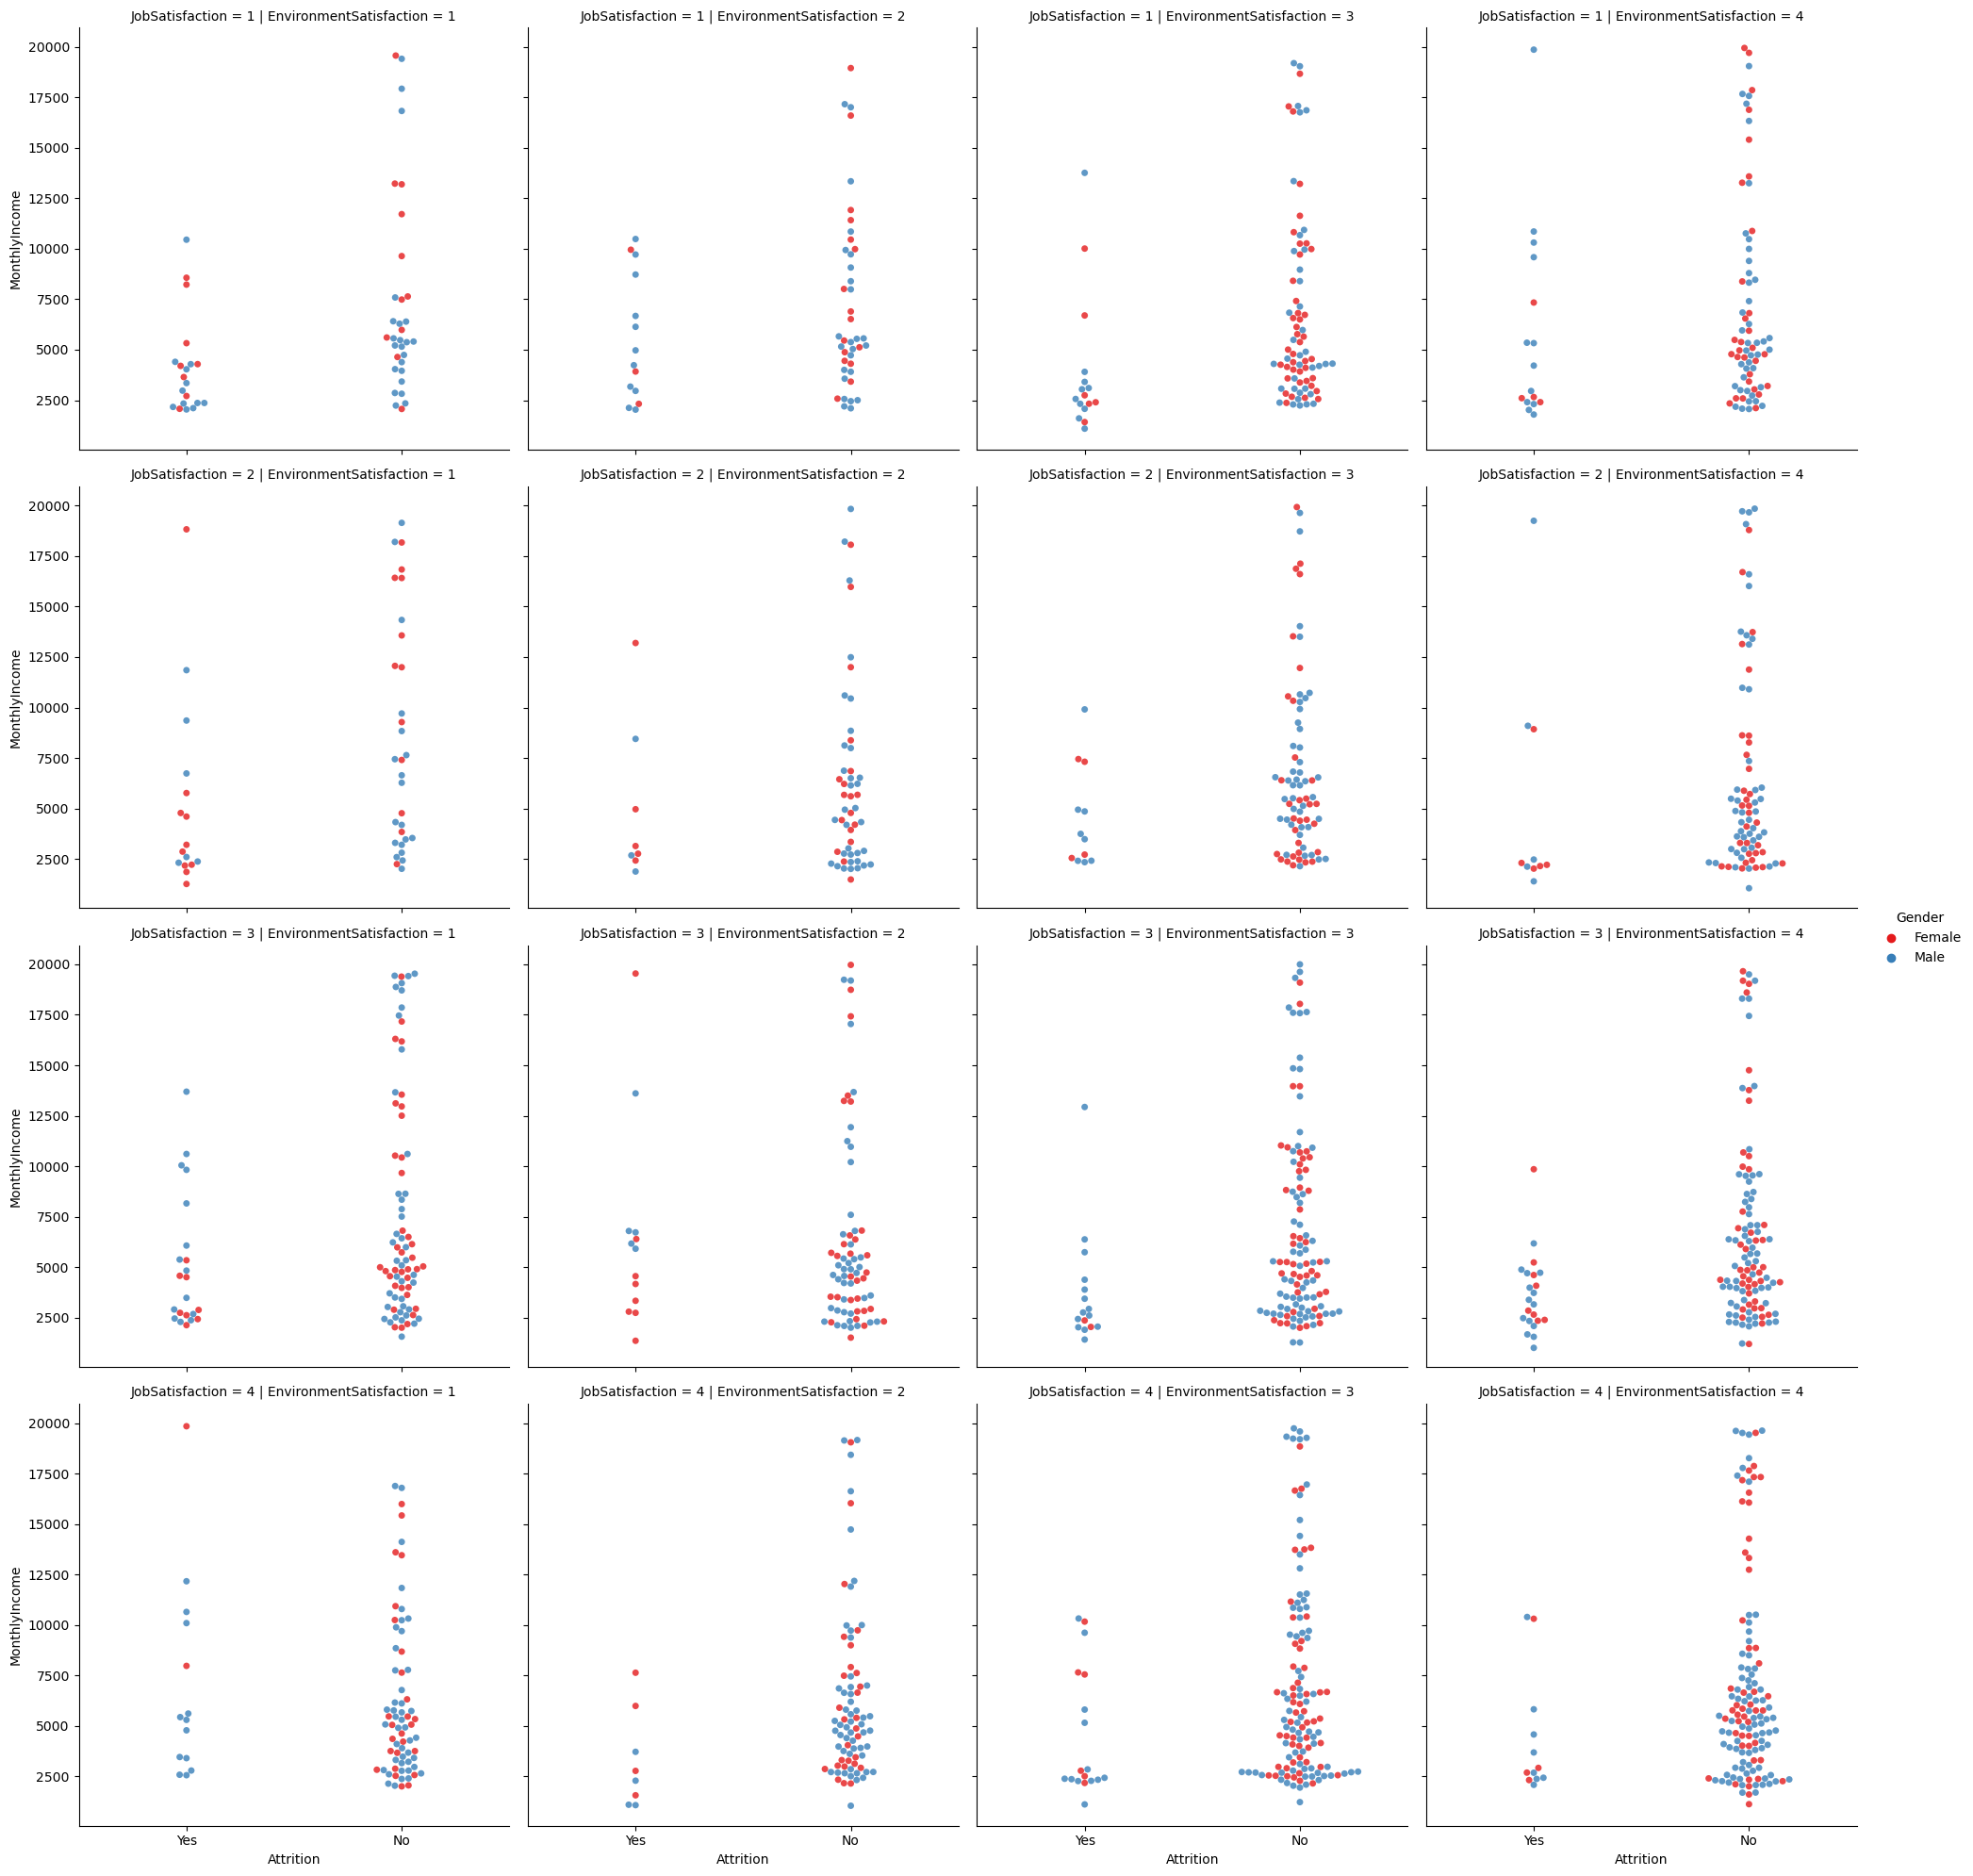

In [25]:
sns.catplot(y= "MonthlyIncome", x= "Attrition" , data=df, kind="swarm",hue="Gender", palette="Set1", row="JobSatisfaction", col = "EnvironmentSatisfaction",alpha=0.8)

In [26]:
# I cannot see an obvious pattern in the scatterplot above.
# I shall dive deeper into data visualization and associations.

In [27]:

df.BusinessTravel.replace('Non-Travel',0, inplace=True)
df.BusinessTravel.replace('Travel_Rarely',1, inplace=True)
df.BusinessTravel.replace('Travel_Frequently',2, inplace=True)

In [28]:
df.BusinessTravel.unique()
df.BusinessTravel = df.BusinessTravel.astype('Int64')

In [29]:
# I will split the columns into integer and object columns.
df_int = df.select_dtypes(include=['int64']) # All the integer columns
df_obj= df.select_dtypes(include=['object']) # All the object columns

In [30]:
df_obj.head()

Attrition              Department EducationField  Gender  \
0       Yes                   Sales  Life Sciences  Female   
1        No  Research & Development  Life Sciences    Male   
2       Yes  Research & Development          Other    Male   
3        No  Research & Development  Life Sciences  Female   
4        No  Research & Development        Medical    Male   

                 JobRole MaritalStatus OverTime  
0        Sales Executive        Single      Yes  
1     Research Scientist       Married       No  
2  Laboratory Technician        Single      Yes  
3     Research Scientist       Married      Yes  
4  Laboratory Technician       Married       No

In [31]:
# I will check correlations between categorical (i.e., object) variables.
# The information about correlation between categorical variables is available here: https://towardsdatascience.com/correlation-when-pearsons-r-is-not-enough-aded72308635

In [32]:
# I will do a correlation test between Attrition and Gender using Phi Coefficient. 
# Phi coefficient (a.k.a. mean square contingency coefficient), denoted by ɸ, is a measure of association
# between two binary or dichotomous variables. 
# It is also known as the Matthews Correlation Coefficient (MCC). 
# In machine learning, MCC is used as a measure of quality of binary or multiclass classifications.

# First, I will test the correlation manually, then I will use mcc.sklearn to get Matthew's Correlation Coefficient. 
table = pd.crosstab(df_obj.Attrition, df_obj.Gender) # Create a contingency table

In [33]:
# Extract the values from the table
n11 = table.iloc[0,0]
n10 = table.iloc[0,1]
n01 = table.iloc[1,0]
n00 = table.iloc[1,1]

In [34]:
# Calculate the phi coefficient
coef = (n11*n00 - n10*n01) / (math.sqrt((n11+n10)*(n11+n01)*(n00+n10)*(n00+n01)))

print(f"Phi Coefficient: {coef}")

Phi Coefficient: 0.029453253175141653


In [35]:
# A very low correlation between Gender and Attrition (Phi = 0.029)

In [36]:
from sklearn.metrics import matthews_corrcoef # I will use mcc.sklearn to calculate Matthew's Correlation Coefficient from now on, instead of manual calculation.

In [37]:
mcc=matthews_corrcoef(df_obj['Attrition'], df_obj['Gender'])
print(f"Matthews Correlation Coefficient: {mcc}")

Matthews Correlation Coefficient: 0.0


In [38]:
# There is no meaningful correlation between Gender and Attrition. 
# Let's see if Attrition is correlated with other categorical variables using mcc.

In [39]:
mcc2= matthews_corrcoef(df_obj['Attrition'], df_obj['MaritalStatus'])
print(f"Matthews Correlation Coefficient: {mcc2}")

Matthews Correlation Coefficient: 0.0


In [40]:
# No meaningful correlation between MaritalStatus and Attrition. 

In [41]:
mcc2= matthews_corrcoef(df_obj.Attrition, df_obj.OverTime)
print(f"Matthews Correlation Coefficient: {mcc2}")

Matthews Correlation Coefficient: 0.2461179942458043


In [42]:
table_ot= pd.crosstab(df_obj.Attrition, df_obj.OverTime) # Create a contingency table
#Calculate the chi-squared statistic and the p-value
chi2, p, dof, expected = sp.stats.chi2_contingency(table_ot)
#Calculate Cramer's V
V = math.sqrt(chi2 / (table_ot.values.sum()*min(table_ot.shape[0]-1, table_ot.shape[1]-1)))

print(f"Cramer's V: {V}")

Cramer's V: 0.24406463632881792


In [43]:
# Interesting, there is a weak correlation between OverTime and Attrition.

In [44]:
# I will explore other categorical variables using Cramer's V
# Cramer’s V (a.k.a. Cramer’s Phi and denoted by V) is a measure of association (or correlation) between two categorical (nominal) variables. 
# This is very similar to Phi Coefficient but it is more generalized in that it can be applied to n*n contingency tables
# (unlike ɸ, which can only be applied to binary variables).
# Cramer’s V is useful here because at least one of the variables is non-binary.

In [45]:
# There is a  weak correlation between Travel Frequency and Attrition (v= 0.128)

In [46]:
table3= pd.crosstab(df_obj.Attrition, df_obj.Department) # Create a contingency table
#Calculate the chi-squared statistic and the p-value
chi2, p, dof, expected = sp.stats.chi2_contingency(table3)
#Calculate Cramer's V
V = math.sqrt(chi2 / (table3.values.sum()*min(table3.shape[0]-1, table3.shape[1]-1)))

print(f"Cramer's V: {V}")

Cramer's V: 0.0856984402909795


In [47]:
# There is a very weak relationship between Department and Attrition (v= 0.085)

In [48]:
table4= pd.crosstab(df_obj.Attrition, df_obj.EducationField) # Create a contingency table
#Calculate the chi-squared statistic and the p-value
chi2, p, dof, expected = sp.stats.chi2_contingency(table4)
#Calculate Cramer's V
V = math.sqrt(chi2 / (table4.values.sum()*min(table4.shape[0]-1, table4.shape[1]-1)))

print(f"Cramer's V: {V}")

Cramer's V: 0.10440851908182987


In [49]:
# There is a very weak relationship between EducationField and Attrition (v= 0.104)

In [50]:
table5= pd.crosstab(df_obj.Attrition, df_obj.JobRole) # Create a contingency table
#Calculate the chi-squared statistic and the p-value
chi2, p, dof, expected = sp.stats.chi2_contingency(table5)
#Calculate Cramer's V
V = math.sqrt(chi2 / (table5.values.sum()*min(table5.shape[0]-1, table5.shape[1]-1)))

print(f"Cramer's V: {V}")

Cramer's V: 0.24214215996065436


In [51]:
# There is a weak association between JobRole and Attrition (v= 0.242)

                Attrition  Department  EducationField    Gender   JobRole  \
Attrition        0.997483    0.077375        0.086617  0.008897  0.230701   
Department       0.077375    1.000000        0.587962  0.025605  0.937128   
EducationField   0.086617    0.587962        1.000000  0.000000  0.335546   
Gender           0.008897    0.025605        0.000000  0.998582  0.073909   
JobRole          0.230701    0.937128        0.335546  0.073909  1.000000   
MaritalStatus    0.173386    0.030019        0.000000  0.032446  0.060936   
OverTime         0.242749    0.000000        0.000000  0.030833  0.000000   

                MaritalStatus  OverTime  
Attrition            0.173386  0.242749  
Department           0.030019  0.000000  
EducationField       0.000000  0.000000  
Gender               0.032446  0.030833  
JobRole              0.060936  0.000000  
MaritalStatus        1.000000  0.000000  
OverTime             0.000000  0.998323  


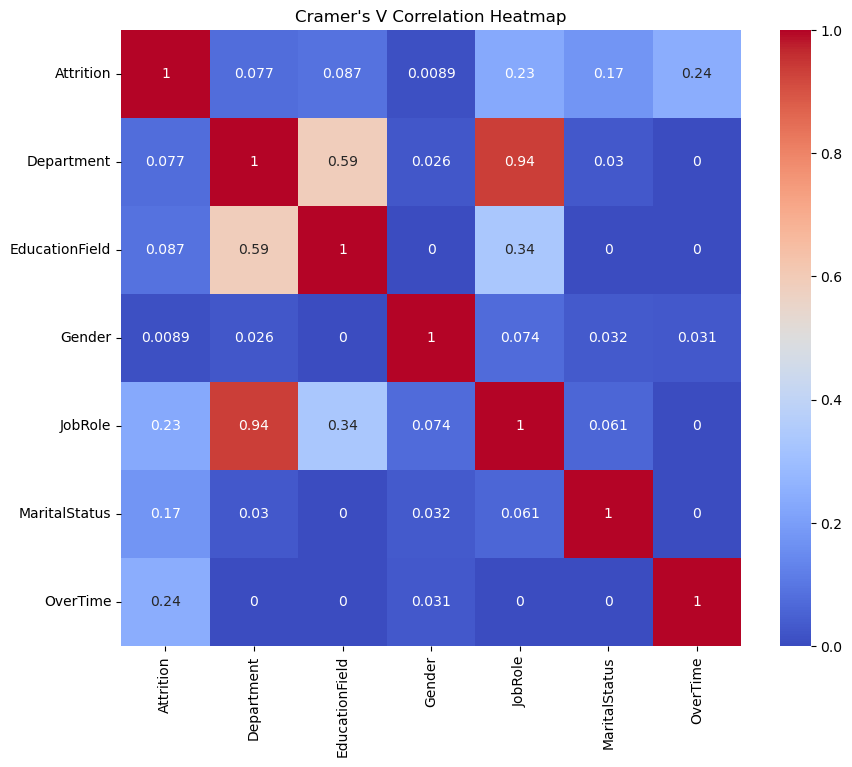

In [52]:
from scipy.stats import chi2_contingency
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    r_corr = r - ((r - 1)**2) / (n - 1)
    k_corr = k - ((k - 1)**2) / (n - 1)
    return np.sqrt(phi2corr / min((k_corr - 1), (r_corr - 1)))


# Initialize an empty correlation matrix
correlation_matrix = pd.DataFrame(index=df_obj.columns, columns=df_obj.columns)

# Loop through each combination of columns and calculate Cramer's V
for col1 in df_obj.columns:
    for col2 in df_obj.columns:
        contingency_table = pd.crosstab(df_obj[col1], df_obj[col2])
        correlation_matrix.loc[col1, col2] = cramers_v(contingency_table)

correlation_matrix = correlation_matrix.apply(pd.to_numeric, errors='coerce')
# Print the correlation matrix
print(correlation_matrix)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=0, vmax=1)
plt.title("Cramer's V Correlation Heatmap")
plt.show()

In [53]:
df_int.head()

Age  BusinessTravel  DailyRate  DistanceFromHome  Education  \
0   41               1       1102                 1          2   
1   49               2        279                 8          1   
2   37               1       1373                 2          2   
3   33               2       1392                 3          4   
4   27               1        591                 2          1   

   EnvironmentSatisfaction  HourlyRate  JobInvolvement  JobLevel  \
0                        2          94               3         2   
1                        3          61               2         2   
2                        4          92               2         1   
3                        4          56               3         1   
4                        1          40               3         1   

   JobSatisfaction  ...  PerformanceRating  RelationshipSatisfaction  \
0                4  ...                  3                         1   
1                2  ...                  4                         4   
2                3  ...                  3                         2   
3                3  ...                  3                         3   
4                2  ...                  3                         4   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                  8                      0   
1                 1                 10                      3   
2                 0                  7                      3   
3                 0                  8                      3   
4                 1                  6                      3   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1               6                   4   
1                3              10                   7   
2                3               0                   0   
3                3               8                   7   
4                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2  

[5 rows x 24 columns]

In [54]:
## Further, I will subset the ordinal columns from the dataframe and analyze the correlation between them.

In [55]:
ord_cols=["Education","BusinessTravel", "EnvironmentSatisfaction",
          "JobInvolvement","JobLevel", "JobSatisfaction","PerformanceRating",
          "RelationshipSatisfaction","StockOptionLevel","WorkLifeBalance"]

In [56]:
df_ord = df[ord_cols] # I seperate columns with ordinal values from columns with continuous values. 

In [57]:
# First, I will replace ordinal numeric values with ordinal categories for better visualization . 

col = ['EnvironmentSatisfaction','JobInvolvement','JobSatisfaction','RelationshipSatisfaction']

for i in df_ord['Education']:
    df_ord['Education'].replace({1:'Below College',2:'College',3:'Bachelor',4:'Master', 5:'Doctor'},
                       inplace = True)
    
for i in df_ord['PerformanceRating']:
    df_ord['PerformanceRating'].replace({1:'Low', 2:'Good',3:'Excellent',4:'Outstanding'},
                                  inplace = True)
    
for i in df_ord['WorkLifeBalance']:
    df_ord['WorkLifeBalance'].replace({1: 'Bad', 2:'Good', 3:'Better', 4:'Best'}, 
                                  inplace = True)

for i in df_ord[col]:
    df_ord[i].replace({1:'Low', 2:'Medium',3:'High', 4:'Very High'},
                   inplace = True)

/var/folders/sv/lx197pm13b792qfncbkx33dr0000gq/T/ipykernel_95385/2459754110.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ord['Education'].replace({1:'Below College',2:'College',3:'Bachelor',4:'Master', 5:'Doctor'},
/var/folders/sv/lx197pm13b792qfncbkx33dr0000gq/T/ipykernel_95385/2459754110.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ord['PerformanceRating'].replace({1:'Low', 2:'Good',3:'Excellent',4:'Outstanding'},
/var/folders/sv/lx197pm13b792qfncbkx33dr0000gq/T/ipykernel_95385/2459754110.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

In [58]:
df_ord.head() # These are the columns with ordinal values

Education  BusinessTravel EnvironmentSatisfaction JobInvolvement  \
0        College               1                  Medium           High   
1  Below College               2                    High         Medium   
2        College               1               Very High         Medium   
3         Master               2               Very High           High   
4  Below College               1                     Low           High   

   JobLevel JobSatisfaction PerformanceRating RelationshipSatisfaction  \
0         2       Very High         Excellent                      Low   
1         2          Medium       Outstanding                Very High   
2         1            High         Excellent                   Medium   
3         1            High         Excellent                     High   
4         1          Medium         Excellent                Very High   

   StockOptionLevel WorkLifeBalance  
0                 0             Bad  
1                 1          Better  
2                 0          Better  
3                 0          Better  
4                 1          Better

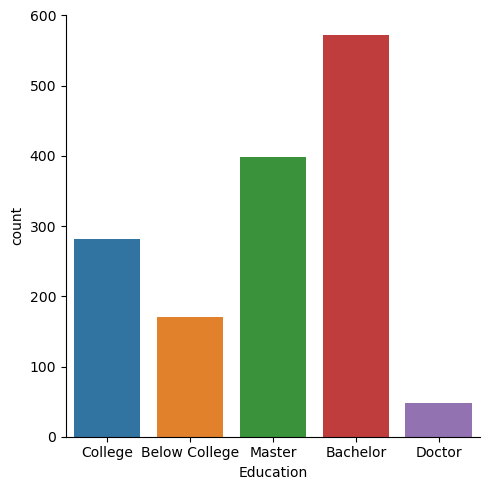

In [59]:
sns.catplot(y= None, x= "Education", data= df_ord, kind = "count")

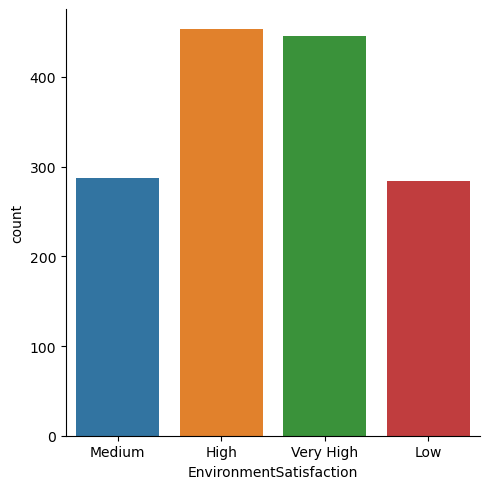

In [60]:
sns.catplot(y= None, x= "EnvironmentSatisfaction", data= df_ord, kind = "count")

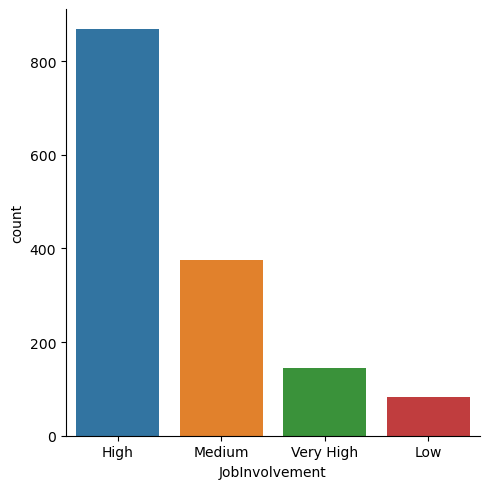

In [61]:
sns.catplot(y= None, x= "JobInvolvement", data= df_ord, kind = "count")

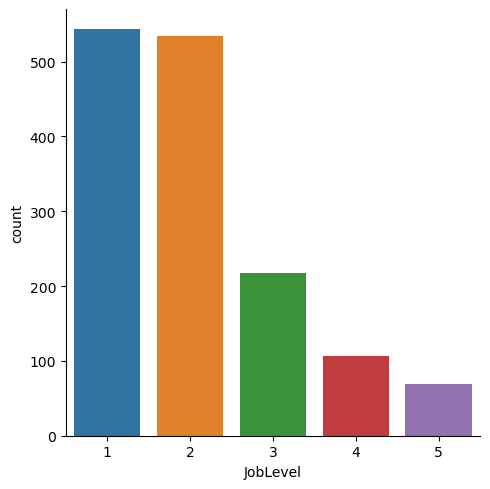

In [62]:
sns.catplot(y= None, x= "JobLevel", data= df_ord, kind = "count")

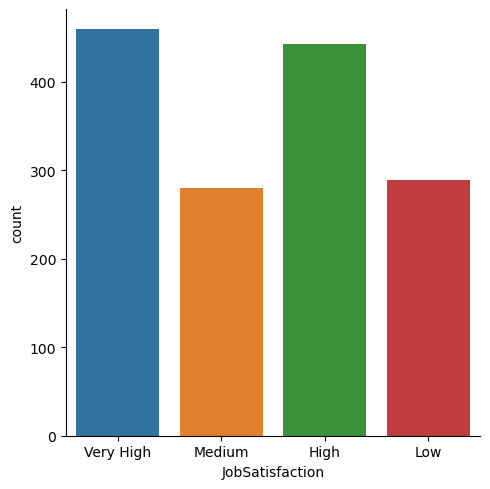

In [63]:
sns.catplot(y= None, x= "JobSatisfaction", data= df_ord, kind = "count")

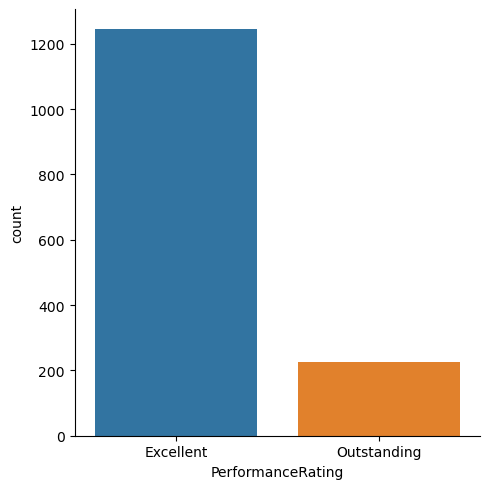

In [64]:
sns.catplot(y= None, x= "PerformanceRating", data= df_ord, kind = "count")

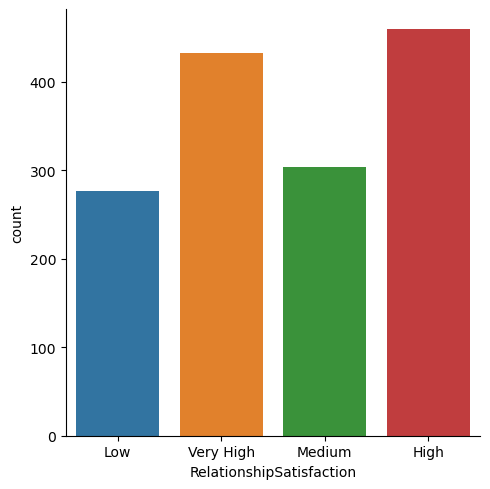

In [65]:
sns.catplot(y= None, x= "RelationshipSatisfaction", data= df_ord, kind = "count")

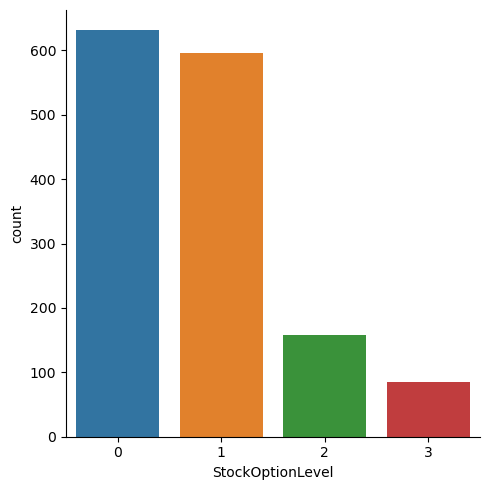

In [66]:
sns.catplot(y= None, x= "StockOptionLevel", data= df_ord, kind = "count")

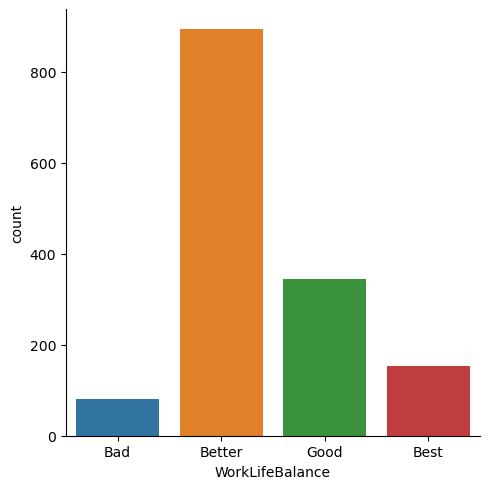

In [67]:
sns.catplot(y= None, x= "WorkLifeBalance", data= df_ord, kind = "count")

In [68]:
# Next, I will check correlations between ordinal variables. 
# Before doing this I will convert ordinal categories to their ordinal numeric representation.
# I am basically undoing what I did above. 

In [69]:
col = ['EnvironmentSatisfaction','JobInvolvement','JobSatisfaction','RelationshipSatisfaction']

for i in df_ord['Education']:
    df_ord['Education'].replace({'Below College':1,'College':2,'Bachelor':3,'Master':4, 'Doctor':5},
                       inplace = True)
    
for i in df_ord['PerformanceRating']:
    df_ord['PerformanceRating'].replace({'Low':1,'Good':2 ,'Excellent':3,'Outstanding': 4},
                                  inplace = True)
    
for i in df_ord['WorkLifeBalance']:
    df_ord['WorkLifeBalance'].replace({'Bad':1 ,'Good':2, 'Better': 3, 'Best': 4}, 
                                  inplace = True)

for i in df_ord[col]:
    df_ord[i].replace({'Low':1, 'Medium': 2,'High':3,'Very High':4},
                   inplace = True)

/var/folders/sv/lx197pm13b792qfncbkx33dr0000gq/T/ipykernel_95385/1539840198.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ord['Education'].replace({'Below College':1,'College':2,'Bachelor':3,'Master':4, 'Doctor':5},
/var/folders/sv/lx197pm13b792qfncbkx33dr0000gq/T/ipykernel_95385/1539840198.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ord['PerformanceRating'].replace({'Low':1,'Good':2 ,'Excellent':3,'Outstanding': 4},
/var/folders/sv/lx197pm13b792qfncbkx33dr0000gq/T/ipykernel_95385/1539840198.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

In [70]:
df_ord.head()

Education  BusinessTravel  EnvironmentSatisfaction  JobInvolvement  \
0          2               1                        2               3   
1          1               2                        3               2   
2          2               1                        4               2   
3          4               2                        4               3   
4          1               1                        1               3   

   JobLevel  JobSatisfaction  PerformanceRating  RelationshipSatisfaction  \
0         2                4                  3                         1   
1         2                2                  4                         4   
2         1                3                  3                         2   
3         1                3                  3                         3   
4         1                2                  3                         4   

   StockOptionLevel  WorkLifeBalance  
0                 0                1  
1                 1                3  
2                 0                3  
3                 0                3  
4                 1                3

In [71]:
corr_ord=df_ord.corr(method="kendall") # Correlation matrix with Kendall's tau for ordinal columns
# I used kendall's tau to calculate the correlation between ordinal variables. 
# https://towardsdatascience.com/correlation-when-pearsons-r-is-not-enough-aded72308635 

<Axes: >

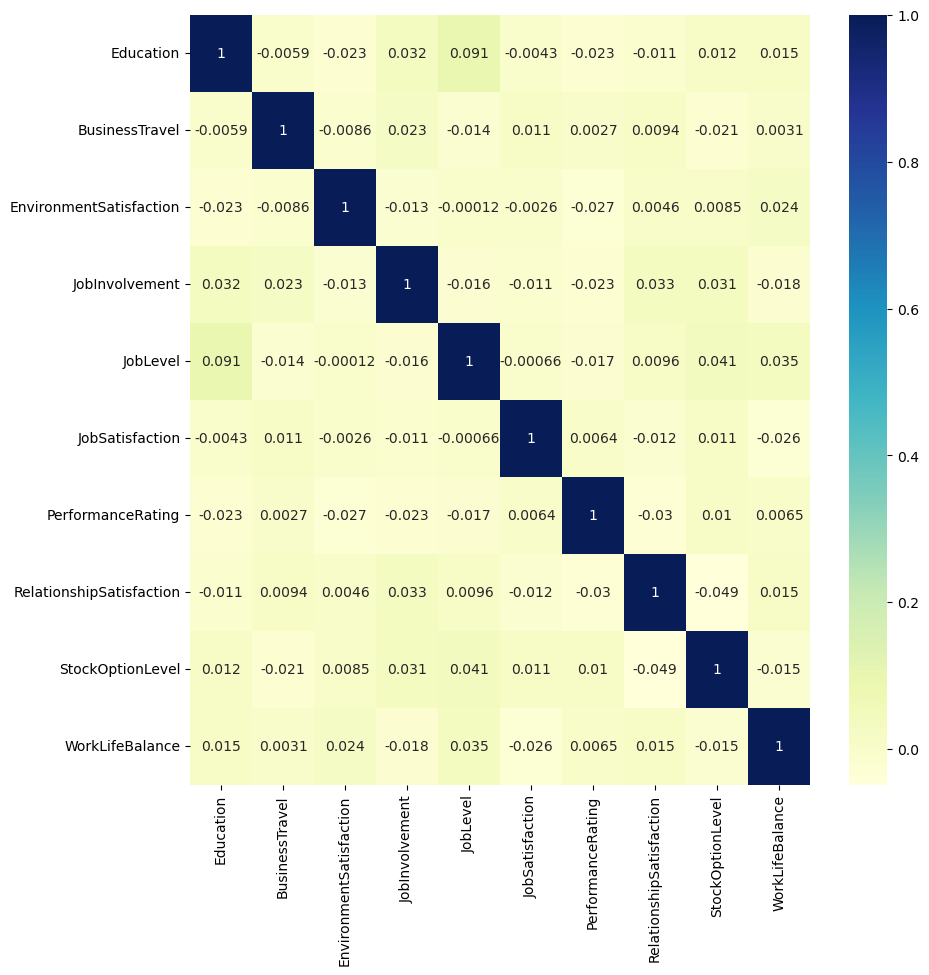

In [72]:
plt.figure(figsize=(10, 10))
sns.heatmap(corr_ord,cmap="YlGnBu", annot=True) # Heatmap of correlation matrix for Kendall's tau

In [73]:
# Very low correlation between ordinal variables. Nothing meaningful. 

<Axes: >

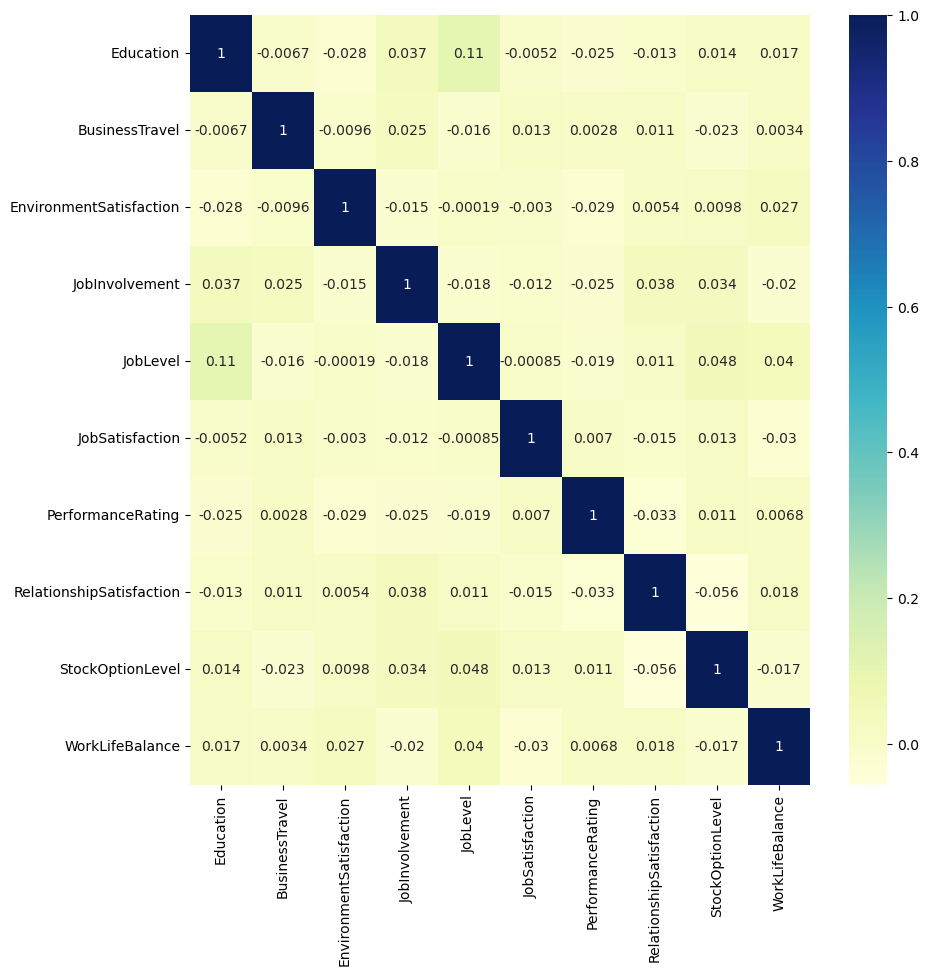

In [74]:
rho_corr = df_ord.corr(method="spearman")
plt.figure(figsize=(10, 10))
sns.heatmap(rho_corr,cmap="YlGnBu", annot=True)

In [75]:
df_num=df.drop(ord_cols, axis=1) # I seperate columns with continuous values and call them df_num


In [76]:
obj_cols=df_obj.columns
print(obj_cols)

Index(['Attrition', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime'],
      dtype='object')


In [77]:
df_num = df_num.drop(obj_cols, axis=1)
df_num.head() # These are the columns with continuous values

Age  DailyRate  DistanceFromHome  HourlyRate  MonthlyIncome  MonthlyRate  \
0   41       1102                 1          94           5993        19479   
1   49        279                 8          61           5130        24907   
2   37       1373                 2          92           2090         2396   
3   33       1392                 3          56           2909        23159   
4   27        591                 2          40           3468        16632   

   NumCompaniesWorked  PercentSalaryHike  TotalWorkingYears  \
0                   8                 11                  8   
1                   1                 23                 10   
2                   6                 15                  7   
3                   1                 11                  8   
4                   9                 12                  6   

   TrainingTimesLastYear  YearsAtCompany  YearsInCurrentRole  \
0                      0               6                   4   
1                      3              10                   7   
2                      3               0                   0   
3                      3               8                   7   
4                      3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'DailyRate'}>,
        <Axes: title={'center': 'DistanceFromHome'}>,
        <Axes: title={'center': 'HourlyRate'}>],
       [<Axes: title={'center': 'MonthlyIncome'}>,
        <Axes: title={'center': 'MonthlyRate'}>,
        <Axes: title={'center': 'NumCompaniesWorked'}>,
        <Axes: title={'center': 'PercentSalaryHike'}>],
       [<Axes: title={'center': 'TotalWorkingYears'}>,
        <Axes: title={'center': 'TrainingTimesLastYear'}>,
        <Axes: title={'center': 'YearsAtCompany'}>,
        <Axes: title={'center': 'YearsInCurrentRole'}>],
       [<Axes: title={'center': 'YearsSinceLastPromotion'}>,
        <Axes: title={'center': 'YearsWithCurrManager'}>, <Axes: >,
        <Axes: >]], dtype=object)

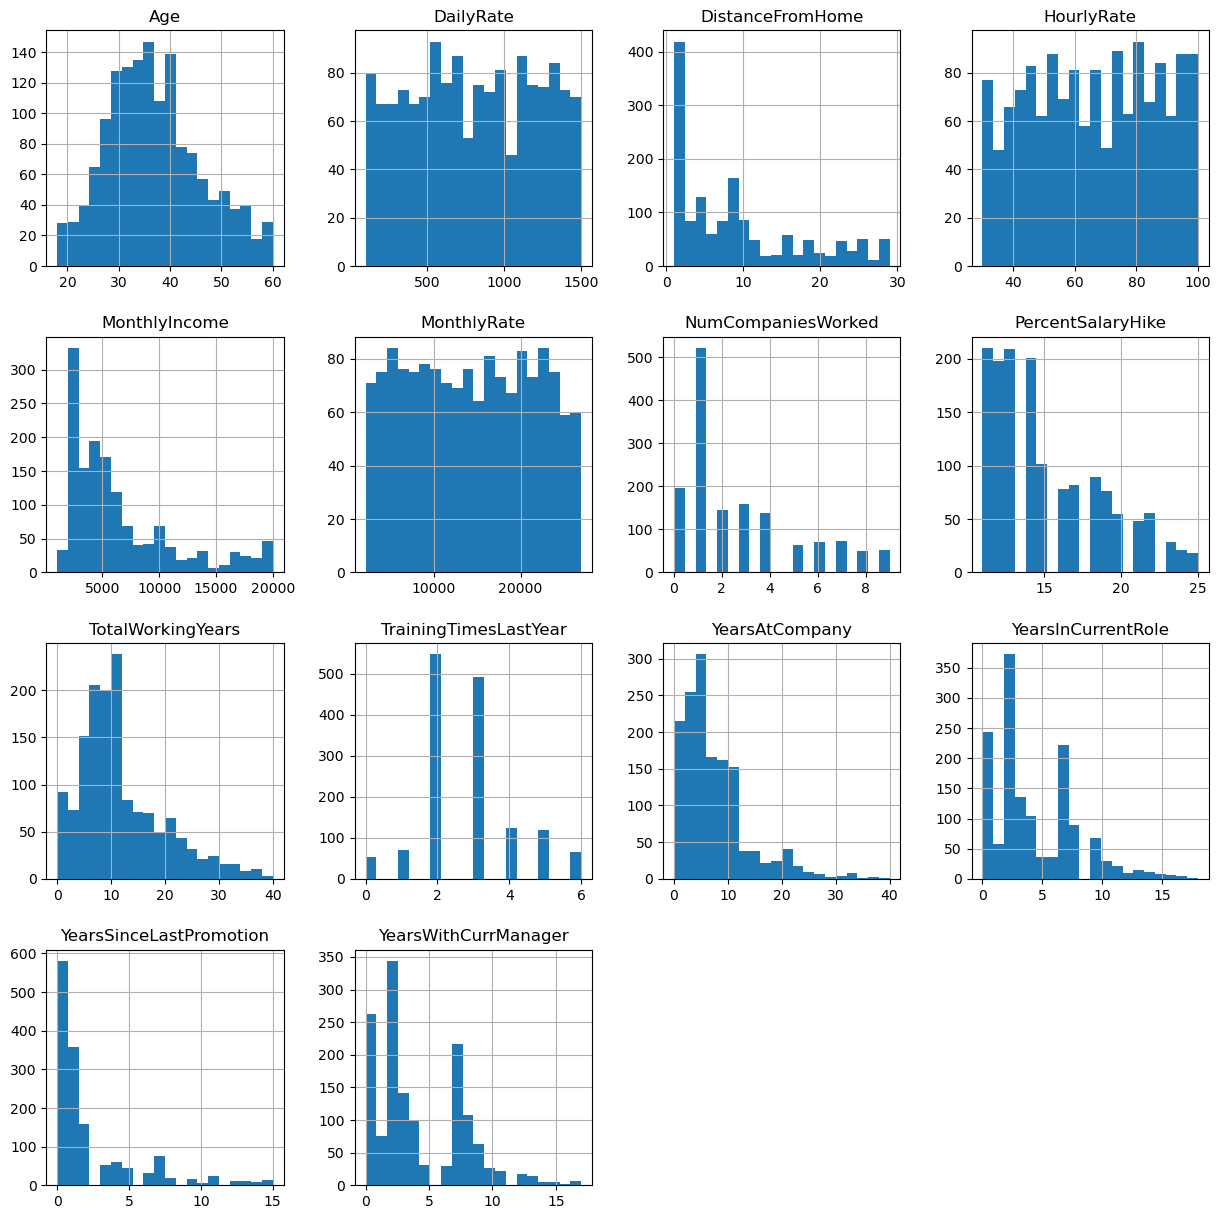

In [78]:
df_num.hist(bins=20, figsize=(15, 15)) #visualize distributions

In [79]:
# Next, I will check correlations between continuous variables.

<Axes: >

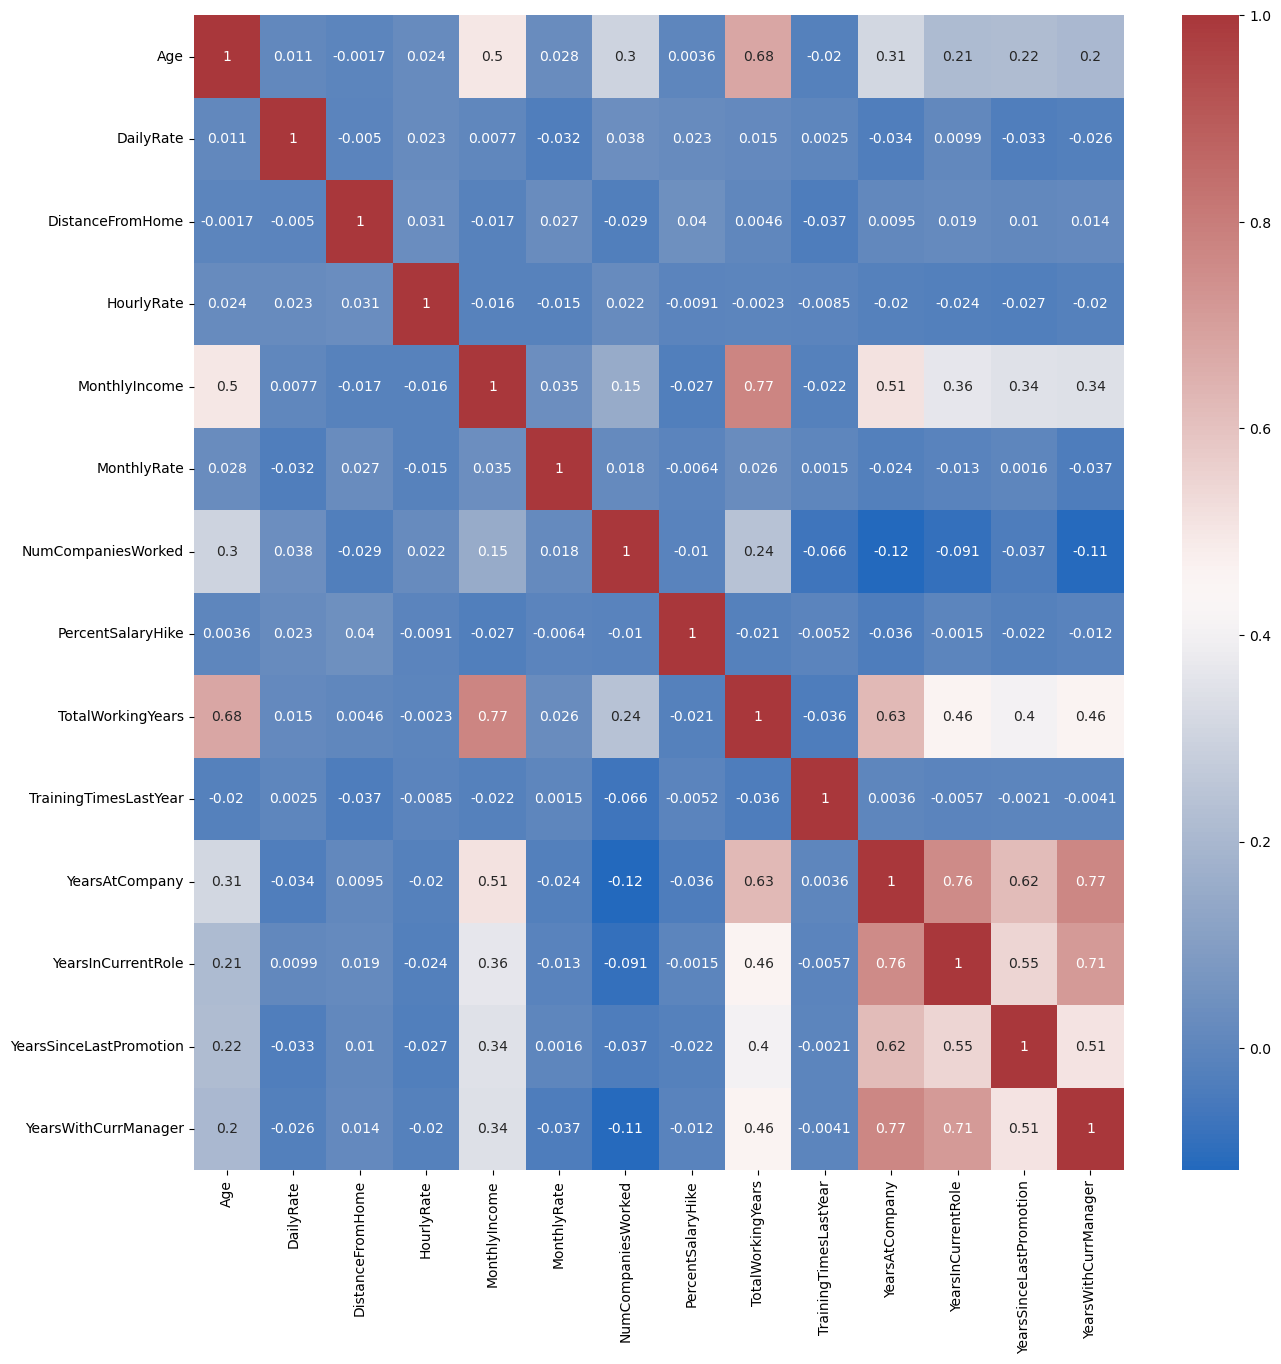

In [80]:
corr_num=df_num.corr(method="pearson")
plt.figure(figsize=(15, 15))
sns.heatmap(corr_num, cmap="vlag", annot=True) # Heatmap of correlation matrix for Pearson's r

In [81]:
# There are a few columns that are relatively highly correlated. 
# TotalWorkingYears is correlated with Age (r= .68) and MonthlyIncome (r=.77).
# YearsAtCompany is correlated with TotalWorkingYears (r= .63), YearsWithCurrManager (r= .77), YearsSinceLastPromotion (r= .62), and YearsinCurrentRole (r= .76).
# YearsInCurrentRole is correlated with YearsWithCurrManager (r= .71), YearsSinceLastPromotion (r= .55).


In [82]:
# Next, I will do dimension reduction. 
# See https://towardsdatascience.com/5-must-know-dimensionality-reduction-techniques-via-prince-e6ffb27e55d1 for information for dimensionality redution via Prince.
#First, I need to import prince package. 

In [83]:
# I will run three rounds of dimension reduction.
# 1. MCA with ordinal variables
# 2. PCA with numerice variables
# 3. FAMD with all variables
# Source for documentation: https://maxhalford.github.io/prince/pca/


In [84]:
import prince

In [85]:
mca = prince.MCA(
    n_components=6,
    n_iter=3,
    copy=True,
    check_input=True,
    engine='sklearn',
    random_state=42
)
mca = mca.fit(df_ord)

In [86]:
mca.eigenvalues_summary

eigenvalue % of variance % of variance (cumulative)
component                                                    
0              0.125         4.33%                      4.33%
1              0.118         4.08%                      8.40%
2              0.115         3.95%                     12.36%
3              0.114         3.93%                     16.28%
4              0.111         3.84%                     20.12%
5              0.109         3.76%                     23.88%

In [87]:
mca.row_coordinates(df_ord).head()

0         1         2         3         4         5
0  0.403796 -0.021283  0.458449 -0.411412  0.918657 -0.161226
1 -0.036976 -0.219412  0.188560  0.053579  0.130620  0.397571
2 -0.155796 -0.225391 -0.159811 -0.337753  0.184692  0.085246
3 -0.297652 -0.226194 -0.635938 -0.100604 -0.136900 -0.148953
4 -0.247556 -0.053046 -0.230411 -0.432275 -0.085641  0.077043

In [88]:
mca.column_coordinates(df_ord).head()

0         1         2         3         4         5
Education_1 -0.604255  0.246427 -0.695856  0.218228  0.287803  0.187262
Education_2  0.717087 -0.067588  0.437725 -0.371465  0.662334  0.040139
Education_3 -0.525500  0.030584  0.188639 -0.207791 -0.017725 -0.236707
Education_4  0.486302 -0.279096 -0.466590  0.403751 -0.386805  0.145061
Education_5  0.157139  1.474027  1.513717  0.537870 -1.492034  0.718922

In [89]:
mca.plot(
    df_ord,
    x_component=0,
    y_component=1)

alt.Chart(...)

In [90]:
mca.column_contributions_.head().style.format('{:.0%}')

In [91]:
mca.column_cosine_similarities(df_ord).head()

0         1         2         3         4         5
Education_1  0.047747  0.007941  0.063321  0.006228  0.010832  0.004586
Education_2  0.122061  0.001084  0.045482  0.032754  0.104133  0.000382
Education_3  0.175900  0.000596  0.022666  0.027502  0.000200  0.035690
Education_4  0.087801  0.028920  0.080827  0.060522  0.055548  0.007812
Education_5  0.000834  0.073342  0.077345  0.009766  0.075145  0.017446

In [92]:
mca = prince.MCA(
    n_components=6, ## I tested multiple components. I chose 6 components. TBH, 4 of 5 components could be used too. 
    n_iter=3,
    copy=True,
    check_input=True,
    engine='sklearn',
    random_state=42
)
mca.fit(df_ord)
df_ord_transformed = mca.transform(df_ord)
# Get the eigenvalues
eigenvalues = mca.eigenvalues_

# Get the explained variance ratios
explained_variance_ratios = eigenvalues / eigenvalues.sum()

# Print the explained variance ratios
print(explained_variance_ratios)

[0.18110266 0.17073717 0.16558314 0.16435121 0.16062524 0.15760059]


In [93]:
print(mca.column_contributions_)

                                   0         1         2         3         4  \
Education_1                 0.033664  0.005939  0.048829  0.004838  0.008611   
Education_2                 0.078645  0.000741  0.032051  0.023255  0.075647   
Education_3                 0.085669  0.000308  0.012074  0.014760  0.000110   
Education_4                 0.051048  0.017835  0.051398  0.038774  0.036413   
Education_5                 0.000643  0.059997  0.065241  0.008299  0.065342   
BusinessTravel_0            0.030848  0.000158  0.002745  0.038944  0.000725   
BusinessTravel_1            0.001365  0.001904  0.005684  0.001928  0.001101   
BusinessTravel_2            0.003313  0.005688  0.011609  0.003601  0.007091   
EnvironmentSatisfaction_1   0.000023  0.001566  0.024717  0.003464  0.018905   
EnvironmentSatisfaction_2   0.044057  0.107166  0.000062  0.036345  0.000174   
EnvironmentSatisfaction_3   0.012349  0.016060  0.008354  0.094908  0.003599   
EnvironmentSatisfaction_4   0.003623  0.

In [94]:
mca.column_coordinates(df_ord)

0         1         2         3         4  \
Education_1                -0.604255  0.246427 -0.695856  0.218228  0.287803   
Education_2                 0.717087 -0.067588  0.437725 -0.371465  0.662334   
Education_3                -0.525500  0.030584  0.188639 -0.207791 -0.017725   
Education_4                 0.486302 -0.279096 -0.466590  0.403751 -0.386805   
Education_5                 0.157139  1.474027  1.513717  0.537870 -1.492034   
BusinessTravel_0            0.615778 -0.042838 -0.175639  0.659115  0.088930   
BusinessTravel_1           -0.049120  0.056335  0.095852 -0.055621  0.041551   
BusinessTravel_2           -0.148500 -0.188925 -0.265806 -0.147491 -0.204612   
EnvironmentSatisfaction_1   0.012168  0.097909 -0.383040 -0.142852 -0.329938   
EnvironmentSatisfaction_2   0.532015  0.805654 -0.019157 -0.460323  0.031475   
EnvironmentSatisfaction_3  -0.224196 -0.248244  0.176320  0.592088  0.113992   
EnvironmentSatisfaction_4  -0.122384 -0.328642  0.077150 -0.214200  0.074060   
JobInvolvement_1            0.020846  1.275856 -1.052717  0.351625  0.799069   
JobInvolvement_2           -0.244962 -0.397223  0.208474  0.083978  0.098125   
JobInvolvement_3            0.047083 -0.194704 -0.129528  0.039988  0.030720   
JobInvolvement_4            0.342101  1.472679  0.844640 -0.662407 -0.901285   
JobLevel_1                 -0.695994  0.213367 -0.256941 -0.217174  0.302040   
JobLevel_2                  0.785388  0.008918  0.061001 -0.073572  0.198860   
JobLevel_3                 -0.290340 -0.564087  0.330306  0.410658 -0.314526   
JobLevel_4                  0.082606  0.163917  0.816805  1.012286 -1.529216   
JobLevel_5                  0.189353 -0.217748 -0.748456 -0.574102 -0.572977   
JobSatisfaction_1          -0.417191 -0.029076  0.713754 -0.063327 -0.198790   
JobSatisfaction_2          -0.084294 -0.177861  0.425256 -0.649351 -0.145429   
JobSatisfaction_3           0.208591 -0.019672 -0.828358 -0.195694  0.088524   
JobSatisfaction_4           0.113232  0.145749  0.088862  0.624436  0.128634   
PerformanceRating_3         0.016573 -0.065538 -0.086892 -0.124305 -0.085991   
PerformanceRating_4        -0.091227  0.360751  0.478293  0.684229  0.473331   
RelationshipSatisfaction_1 -0.043858  0.306621  0.464179 -0.191495  0.916079   
RelationshipSatisfaction_2  0.136013 -0.044714 -0.109757  0.309770 -0.210273   
RelationshipSatisfaction_3 -0.328265  0.206773 -0.118172  0.470519  0.079802   
RelationshipSatisfaction_4  0.281404 -0.384231 -0.094019 -0.594852 -0.522580   
StockOptionLevel_0         -0.445838 -0.165670 -0.165866 -0.217013 -0.219071   
StockOptionLevel_1          0.271423 -0.018396  0.257469  0.205313  0.271458   
StockOptionLevel_2          1.025321 -0.179978  0.031201 -0.092674  0.113208   
StockOptionLevel_3         -0.499353  1.693392 -0.631995  0.343654 -0.487552   
WorkLifeBalance_1          -0.242472 -0.902965  0.806346 -0.558672  1.359481   
WorkLifeBalance_2           0.120052  0.459596 -0.397557  0.174260  0.172694   
WorkLifeBalance_3          -0.071735  0.044279  0.087421 -0.137804 -0.135280   
WorkLifeBalance_4           0.275550 -0.819641 -0.038010  0.704621 -0.309544   

                                   5  
Education_1                 0.187262  
Education_2                 0.040139  
Education_3                -0.236707  
Education_4                 0.145061  
Education_5                 0.718922  
BusinessTravel_0            1.131169  
BusinessTravel_1           -0.077794  
BusinessTravel_2           -0.319626  
EnvironmentSatisfaction_1  -0.094358  
EnvironmentSatisfaction_2   0.159779  
EnvironmentSatisfaction_3   0.448646  
EnvironmentSatisfaction_4  -0.498420  
JobInvolvement_1            0.753833  
JobInvolvement_2            0.172428  
JobInvolvement_3           -0.151234  
JobInvolvement_4            0.028070  
JobLevel_1                 -0.071531  
JobLevel_2                 -0.027259  
JobLevel_3                  0.609621  
JobLevel_4                 -0.655717  
JobLevel_5     

In [95]:
mca.plot(
    df_ord, x_component =0,
    y_component=1
)

alt.Chart(...)

In [96]:
## The graph above shows how much each column stands out for the first two components. StockOptionLevel stands out for component 0.
# While JobLevel stands out for component 1.

In [97]:
mca.plot(
    df_ord,
    x_component=2,
    y_component=3
)

alt.Chart(...)

In [98]:
## The graph above shows how much each column stands out for the components 2 and 3. JobSatisfaction stands out for component 2.
# While RelationshipSatisfaction stands out for component 3.
# EnvironmentSatisfaction contributes to variation in both components, though its contribution is relatively low and 
# it appears in the negative coordiantes for both components.
# Other columns appear to cluster aroud the center.

In [99]:
mca.plot(
    df_ord,
    x_component=4,
    y_component=5
)

alt.Chart(...)

In [100]:
# Education stands out for component 4 although it is in the negative coordinates.
# 

In [101]:
mca.column_contributions_.style.format('{:.0%}') # Percentage of variance explained by each component. 


In [102]:
# I don't see a lot of columns sticking together in specific components. StockOptionLevel is the only one that contributes to component 0. 
# JobLEvel is the only one that contributes to component 1.
# JobSatisfaction and EnvironmentSatisfaction are the only ones that contribute to component 2.
# EnvironmentSatisfaction and RelationshipSatisfaction are the only ones that contribute to component 3.
# Education and RelationshipSatisfaction are the only ones that contribute to component 4.
# Education, JobInvolvement, and WorklifeBalance are the only ones that contribute to component 5.

In [103]:
### Next I will do PCA with numerical variables

In [104]:
pca = prince.PCA(
    n_components=3, # I set the number of components to 3
    n_iter=3,
    rescale_with_mean=True,
    rescale_with_std=True,
    copy=True,
    check_input=True,
    engine='sklearn',
    random_state=42
)
pca = pca.fit(df_num)

In [105]:
pca.eigenvalues_summary

eigenvalue % of variance % of variance (cumulative)
component                                                    
0              4.017        28.69%                     28.69%
1              1.650        11.79%                     40.48%
2              1.069         7.63%                     48.11%

In [106]:
# The first two components explain more than 40% of variance. The third component does not explain much.

In [107]:
pca.scree_plot()

alt.Chart(...)

In [108]:
pca.column_coordinates_ # Coordinates for each component

component                       0         1         2
variable                                             
Age                      0.561489  0.606556 -0.003378
DailyRate               -0.013659  0.100151  0.214290
DistanceFromHome         0.009644 -0.053394  0.687271
HourlyRate              -0.022624  0.080504  0.364020
MonthlyIncome            0.722757  0.373050 -0.054028
MonthlyRate              0.002251  0.110679 -0.021040
NumCompaniesWorked       0.062114  0.719550 -0.005788
PercentSalaryHike       -0.030767 -0.005933  0.481548
TotalWorkingYears        0.832310  0.408640 -0.009943
TrainingTimesLastYear   -0.022033 -0.118771 -0.422796
YearsAtCompany           0.888745 -0.273724 -0.002201
YearsInCurrentRole       0.784346 -0.358946  0.049789
YearsSinceLastPromotion  0.690087 -0.255198 -0.004144
YearsWithCurrManager     0.773960 -0.379135  0.032854

In [109]:
pca.plot(
    df_int,
    x_component=0,
    y_component=1,
    
    show_rows=True,
    show_columns=True
)

alt.LayerChart(...)

In [110]:
pca.column_contributions_.style.format('{:.0%}') # No colunmn really stands out

In [111]:
# YearsAtCompany, YearsWithCurrManager, YearsSinceLastPromotion, and YearsinCurrentRole, TotalWorkingYears, and MonthlyIncome contribute to component 0.
# Age, NumCompaniesWored, and TotalWorkingYears contribute to component 1.
# DistanceFromHome, PercentSalaryHike, TrainingTimesLastYear, and HourIncome contribute to component 2.

In [112]:
pca.column_correlations

component                       0         1         2
variable                                             
Age                      0.561489  0.606556 -0.003378
DailyRate               -0.013659  0.100151  0.214290
DistanceFromHome         0.009644 -0.053394  0.687271
HourlyRate              -0.022624  0.080504  0.364020
MonthlyIncome            0.722757  0.373050 -0.054028
MonthlyRate              0.002251  0.110679 -0.021040
NumCompaniesWorked       0.062114  0.719550 -0.005788
PercentSalaryHike       -0.030767 -0.005933  0.481548
TotalWorkingYears        0.832310  0.408640 -0.009943
TrainingTimesLastYear   -0.022033 -0.118771 -0.422796
YearsAtCompany           0.888745 -0.273724 -0.002201
YearsInCurrentRole       0.784346 -0.358946  0.049789
YearsSinceLastPromotion  0.690087 -0.255198 -0.004144
YearsWithCurrManager     0.773960 -0.379135  0.032854

In [113]:
# Finally, I will run a Factor Analysis of Mixed Data (FAMD) 

In [114]:
famd = prince.FAMD(n_components = 3, n_iter = 3, copy=True,
    check_input=True, random_state = 42, engine="sklearn",
    handle_unknown="error")
famd = famd.fit(df)

ValueError: All variables are qualitative: MCA should be used

In [ ]:
famd.eigenvalues_summary

eigenvalue % of variance % of variance (cumulative)
component                                                    
0              9.792         8.82%                      8.82%
1              9.514         8.57%                     17.39%
2              8.101         7.30%                     24.69%

In [ ]:
# Not much variance explained is explained by any components. 

In [ ]:
famd.plot(df, x_component = 0, y_component = 1)

alt.LayerChart(...)

In [ ]:
famd.column_contributions_.style.format('{:.0%}')

In [ ]:
# As the table above shows, no column really makes a significant contribution to any component. 

In [ ]:
# Conclusion: 
# Attrition is weakly correlated with JobRole and OverTime (0.24 and 0.23 respectively)
# Dimensionality reduction doesn not seem very possible with FAMD. PCA and MCA provide some evidence regarding existence of meaningful dimensions, 
# but there is no major dimension that explains a significant percentage of variance.
# I recommend not eliminating any of the columns as a result of dimensionality reduction algoritms. 
# The next step would be developing classification models for predicting attrition. 